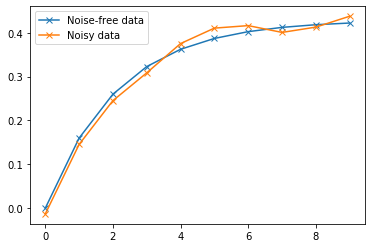

In [2]:
import pyabc
from study_abc_noise.model import ConversionReaction1dModelVars as ModelVars
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pickle
import numpy as np

mv = ModelVars(n_acc=10000, n_t=10)

model = mv.get_model()
model_noisy = mv.get_model_noisy()

if os.path.exists("data.dat"):
    data_nonoise, data = pickle.load(open("data.dat", 'rb'))
else:
    data_nonoise = model(mv.p_true)
    data = model_noisy(mv.p_true)
    pickle.dump((data_nonoise, data), open("data.dat", 'wb'))

plt.plot(data_nonoise['y'], 'x-', label="Noise-free data")
plt.plot(data['y'], 'x-', label="Noisy data")
plt.legend()

prior = mv.get_prior()

In [ ]:
distance = mv.get_distance()

abc = pyabc.ABCSMC(model, prior, distance, population_size=10000)
abc.new("sqlite:///h_incorrect.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)

In [ ]:
distance = mv.get_distance()

abc = pyabc.ABCSMC(model_noisy, prior, distance, population_size=10000)
abc.new("sqlite:///h_noisymodel.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)

In [ ]:
kernel = mv.get_kernel()
temperature = pyabc.Temperature()
acceptor = pyabc.StochasticAcceptor()

abc = pyabc.ABCSMC(model, prior, kernel,
                   eps=temperature, acceptor=acceptor,
                   population_size=10000)
abc.new("sqlite:///h_stochasticacceptor.db", data)
abc.run()

In [ ]:
def l1(x, y):
    return np.sum(np.abs(x['y'] - y['y']) / mv.noise_std)

abc = pyabc.ABCSMC(model, prior, l1, population_size=10000)
abc.new("sqlite:///h_incorrect_l1.db", data)
abc.run(max_nr_populations=11, min_acceptance_rate=1e-4)